<a href="https://colab.research.google.com/github/iqrasarwar/ComputerVision/blob/main/mids_thersholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

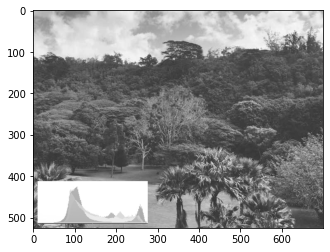

In [70]:
im = cv.imread("/content/drive/MyDrive/ComputerVisionCoLabFiles/low.jpg",0)
plt.imshow (im, cmap = "gray")
plt.show()

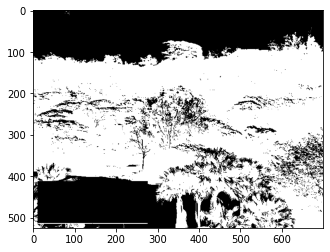

In [57]:
r,c = im.shape[0],im.shape[1]
i = 0
j = 0
m1 = im.mean()
new_img =  im.copy()
for i in range(r):
  for j in range(c):
    if im[i][j] > m1:
      new_img[i][j] = 0
    else:
      new_img[i][j] = 1
plt.imshow (new_img, cmap = "gray")
plt.show()

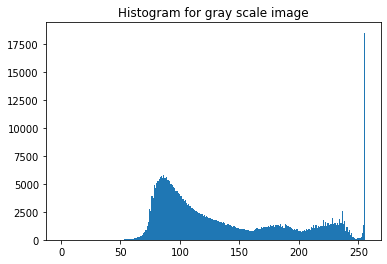

In [53]:
im = cv.imread("/content/drive/MyDrive/ComputerVisionCoLabFiles/low.jpg",cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([im], [0], None, [256], [0, 256]) 
plt.hist(im.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()

In [54]:
print(np.median(im))

116.0


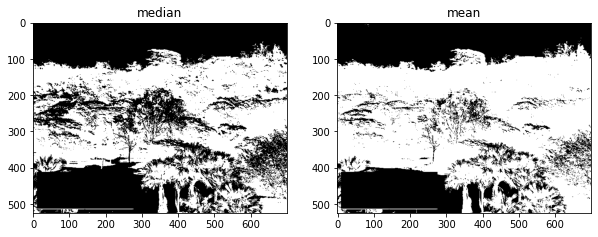

In [71]:
r,c = im.shape[0],im.shape[1]
i = 0
j = 0
m1 = np.median(im)
new_img1 =  im.copy()
for i in range(r):
  for j in range(c):
    if im[i][j] > m1:
      new_img1[i][j] = 0
    else:
      new_img1[i][j] = 1
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.title('median')
plt.imshow (new_img1, cmap = "gray")
fig.add_subplot(1,2,2)
plt.title('mean')
plt.imshow (new_img, cmap = "gray")
plt.show()

In [72]:
img = im
b_img = im
THRESH = img.mean()
while True:
    foreground_img = (img > THRESH) * img
    background_img = (img <= THRESH) * img
    mean1 = foreground_img.mean()  
    mean2 = background_img.mean()  
    
    new_THRESH = (mean1 + mean2) / 2 
    diff = new_THRESH - THRESH         
    
    if diff > 1e-4:           
        THRESH = new_THRESH
    else:                      
        cv.imwrite("/content/drive/MyDrive/ComputerVisionCoLabFiles/foreground_img.jpg", foreground_img)
        cv.imwrite("/content/drive/MyDrive/ComputerVisionCoLabFiles/background_img.jpg", background_img)
        break
for i in range(r):
    for j in range(c):
        if(img[i,j] >= THRESH):
            b_img[i,j] = 255
        else:
            b_img[i,j]=0
            


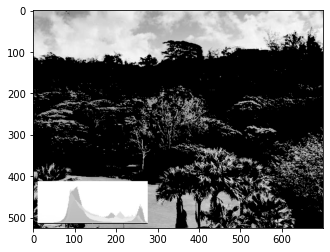

In [88]:
im = cv.imread("/content/drive/MyDrive/ComputerVisionCoLabFiles/foreground_img.jpg",0)
plt.imshow (im, cmap = "gray")
plt.show()

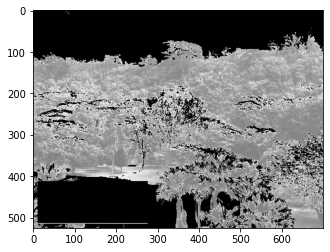

In [74]:
im = cv.imread("/content/drive/MyDrive/ComputerVisionCoLabFiles/background_img.jpg",0)
plt.imshow (im, cmap = "gray")
plt.show()

In [80]:
for i in range(r):
    for j in range(c):
        if(img[i,j] >= THRESH):
            b_img[i,j] = 0
        else:
            b_img[i,j]= 255
            
cv.imwrite("/content/drive/MyDrive/ComputerVisionCoLabFiles/Binarized_Image.jpg", b_img)

True

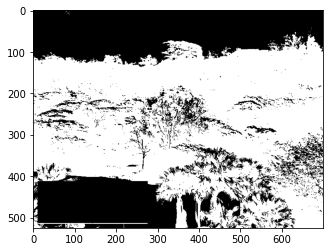

In [90]:
im = cv.imread("/content/drive/MyDrive/ComputerVisionCoLabFiles/Binarized_Image.jpg",0)
plt.imshow (im, cmap = "gray")
plt.show()

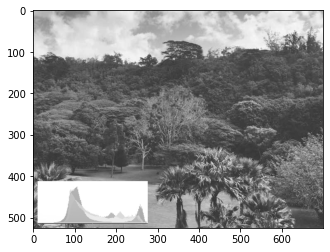

In [84]:
imorg = cv.imread("/content/drive/MyDrive/ComputerVisionCoLabFiles/low.jpg",0)
plt.imshow (imorg, cmap = "gray")
plt.show()

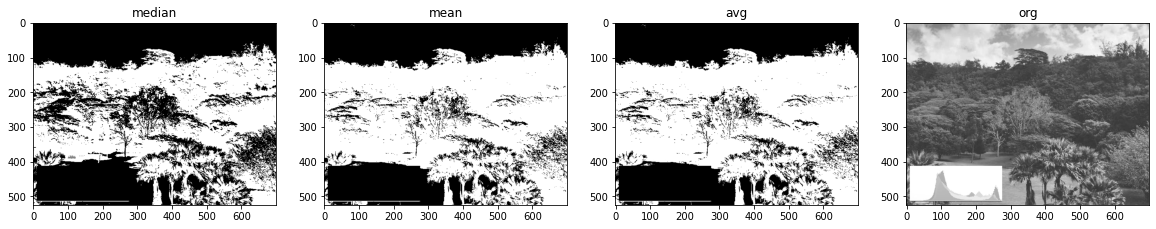

In [91]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,4,1)
plt.title('median')
plt.imshow (new_img1, cmap = "gray")
fig.add_subplot(1,4,2)
plt.title('mean')
plt.imshow (new_img, cmap = "gray")
fig.add_subplot(1,4,3)
plt.title('avg')
plt.imshow (im, cmap = "gray")
fig.add_subplot(1,4,4)
plt.title('org')
plt.imshow (imorg, cmap = "gray")
plt.show()

In [92]:
import cv2
img_gray = imorg
# applying different thresholding techniques on the input image all pixels value above THRESH will be set to 255
thresh1, res_img1 = cv2.threshold(img_gray, THRESH, 255, cv2.THRESH_BINARY)
thresh2, res_img2 = cv2.threshold(img_gray, THRESH, 255, cv2.THRESH_BINARY_INV)
thresh3, res_img3 = cv2.threshold(img_gray, THRESH, 255, cv2.THRESH_TRUNC)
thresh4, res_img4 = cv2.threshold(img_gray, THRESH, 255, cv2.THRESH_TOZERO)
thresh5, res_img5 = cv2.threshold(img_gray, THRESH, 255, cv2.THRESH_TOZERO_INV)

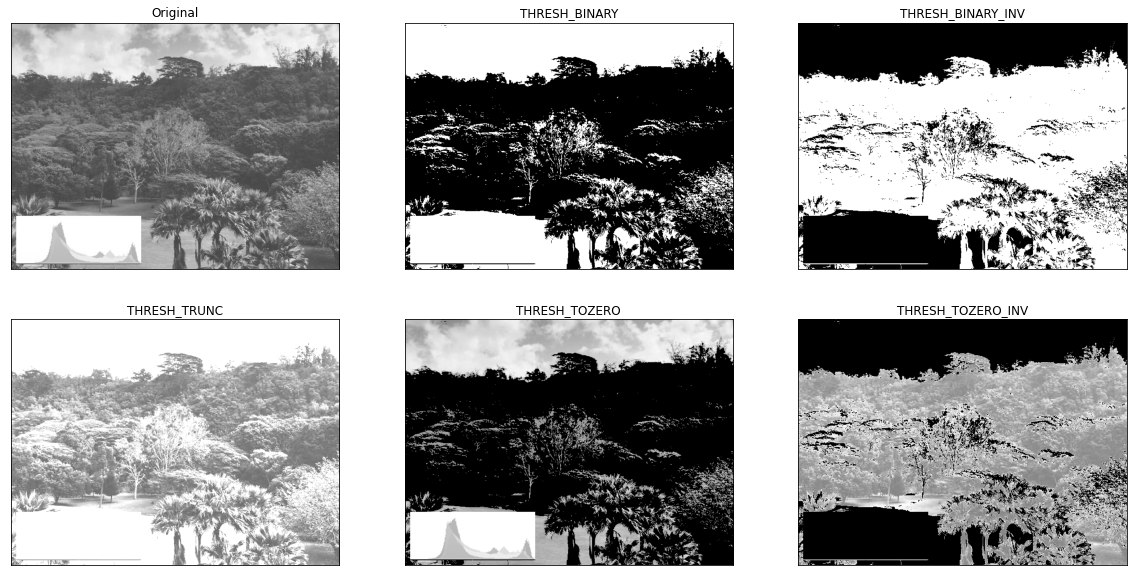

In [94]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.imshow(cv2.cvtColor(imorg, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(res_img1, cmap='gray')
plt.title('THRESH_BINARY')
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(res_img2, cmap='gray')
plt.title('THRESH_BINARY_INV')
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(res_img3, cmap='gray')
plt.title('THRESH_TRUNC')
plt.xticks([])
plt.yticks([])

plt.subplot(235)
plt.imshow(res_img4, cmap='gray')
plt.title('THRESH_TOZERO')
plt.xticks([])
plt.yticks([])

plt.subplot(236)
plt.imshow(res_img5, cmap='gray')
plt.title('THRESH_TOZERO_INV')
plt.xticks([])
plt.yticks([])

plt.savefig("threshold_results2.png")
plt.show()

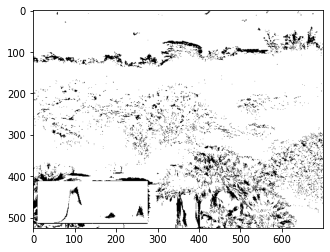

In [100]:
th = cv.adaptiveThreshold(imorg,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,55,27)
plt.imshow(th,cmap="gray")